In [1]:
from data_loader import load_and_prepare_data
from credit_models import modelValuation
from sklearn.ensemble import RandomForestClassifier
from tuner import tune_model

c:\Users\KrishnaWali\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X_train, X_test, Y_train, Y_test = load_and_prepare_data('randomforest')
best_params = tune_model("random_forest", X_train, Y_train, n_trials=150, n_splits=7)
model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
model.fit(X_train, Y_train)

y_proba = model.predict_proba(X_test)[:, 1]

[I 2025-06-09 13:15:11,386] A new study created in memory with name: no-name-8b199ad5-b856-4906-ae9d-6a7b85aa55b8
[I 2025-06-09 13:15:20,192] Trial 0 finished with value: 0.6261286085110361 and parameters: {'n_estimators': 218, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.6261286085110361.
[I 2025-06-09 13:15:25,207] Trial 1 finished with value: 0.6229097545917656 and parameters: {'n_estimators': 322, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6261286085110361.
[I 2025-06-09 13:15:32,391] Trial 2 finished with value: 0.6992024931252473 and parameters: {'n_estimators': 208, 'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.6992024931252473.
[I 2025-06-09 13:15:48,004] Trial 3 finished with value: 0.6208849121149206 and


[⚙️ RandomForest] Using Best Threshold = 0.3985 (F1 = 0.768, P = 0.663, R = 0.912)

🔍 [RandomForest] Classification Report @ Threshold = 0.3984579773578313
                 precision    recall  f1-score   support

Good Credit (0)       0.86      0.54      0.66       500
 Bad Credit (1)       0.66      0.91      0.77       500

       accuracy                           0.72      1000
      macro avg       0.76      0.72      0.71      1000
   weighted avg       0.76      0.72      0.71      1000

🧠 Explanation of Key Metrics:
- Precision (Good Credit): 0.86 → 86% of those predicted as good credit were correct.
- Recall (Good Credit)   : 0.54 → 54% of all actual good credits were correctly identified.
- Precision (Bad Credit) : 0.66 → 66% of those predicted as bad credit were correct.
- Recall (Bad Credit)    : 0.91 → 91% of all actual bad credits were correctly identified.
- Accuracy               : 0.72 → 72% of all predictions were correct.
- ROC-AUC                : 0.83 → Model dis

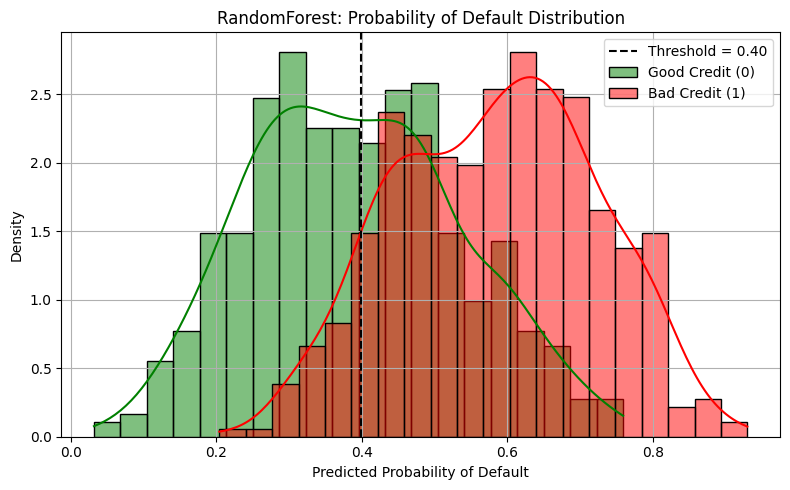

In [8]:
y_pred, chosen_thresh = modelValuation("RandomForest", Y_test, y_proba, use_best_threshold=True)


[⚙️ RandomForest] Using Default Threshold = 0.5

🔍 [RandomForest] Classification Report @ Threshold = 0.5
                 precision    recall  f1-score   support

Good Credit (0)       0.72      0.77      0.75       500
 Bad Credit (1)       0.76      0.70      0.73       500

       accuracy                           0.74      1000
      macro avg       0.74      0.74      0.74      1000
   weighted avg       0.74      0.74      0.74      1000

🧠 Explanation of Key Metrics:
- Precision (Good Credit): 0.72 → 72% of those predicted as good credit were correct.
- Recall (Good Credit)   : 0.77 → 77% of all actual good credits were correctly identified.
- Precision (Bad Credit) : 0.76 → 76% of those predicted as bad credit were correct.
- Recall (Bad Credit)    : 0.70 → 70% of all actual bad credits were correctly identified.
- Accuracy               : 0.74 → 74% of all predictions were correct.
- ROC-AUC                : 0.83 → Model distinguishes good vs. bad credit with 83% confidence

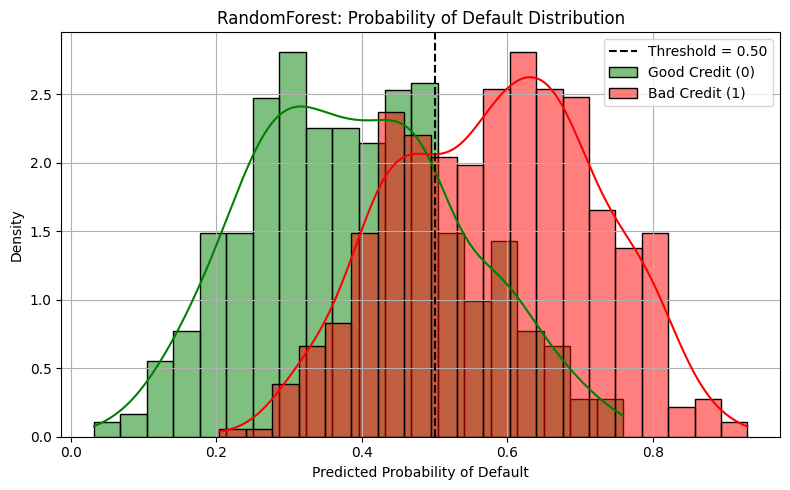

In [5]:
y_pred, chosen_thresh = modelValuation("RandomForest", Y_test, y_proba, use_best_threshold=False)

In [9]:
import joblib
joblib.dump(y_proba, "proba_rf.pkl") 

['proba_rf.pkl']